# 머신러닝 라이브러리 없이 알고리즘 구현하기


polynomial regression의 underfitting problem과 overfitting problem 다루기

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
data= loadmat('data.mat')

In [2]:
X=data['X']
y=data['y']
Xval=data['Xval']
yval=data['yval']
Xtest=data['Xtest']
ytest=data['ytest']

theta=np.ones([2,1])

In [3]:
def costFunction(X, y, theta, Lambda):
    m= len(y)
    J= 0
        
    h=np.array(np.dot(np.matrix(X),theta))
    
    theta_reg=np.vstack((np.zeros([1,1]), theta[1:]))
    
    J=(1/(2*m))*((h-y)**2).sum() + (Lambda/(2*m))*(theta_reg**2).sum()
    
    grad = (1/m)*(np.dot(X.transpose(),(h-y)))+ (Lambda/m)*theta_reg
    
    return [J, grad]


def train(X, y, Lambda):
    Theta = np.zeros([X.shape[1],1]) #initial theta

    grad=np.zeros([X.shape[1],1])
    
    print('Training start\tJ=', costFunction(X, y, Theta, Lambda)[0])
    
    for epoch in range(1,epochs+1):
        [J, grad] = costFunction(X, y, Theta, Lambda)
        Theta=Theta-lr*grad

        if(epoch%(epochs/10)==0):
            print("epoch:", epoch, "cost:", J)
            print("theta:", Theta)
        
    return Theta

def forward(X, theta):
    return np.dot(X, theta)


def train_no_print(X, y, Lambda):
    Theta = np.zeros([X.shape[1],1]) #initial theta

    grad=np.zeros([X.shape[1],1])
    
    for epoch in range(1,epochs+1):
        [J, grad] = costFunction(X, y, Theta, Lambda)
        Theta=Theta-lr*grad
    
    print("training end")
        
    return Theta

### 데이터셋(training set, cross validation set, test set)을 그려보면 다음과 같다

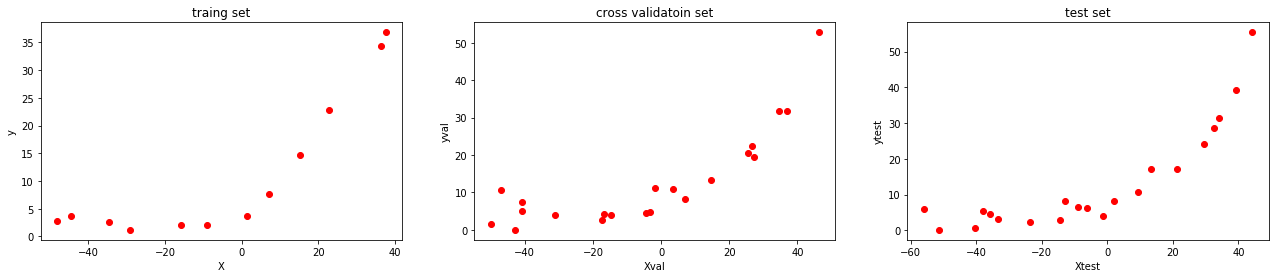

In [31]:
f, ax = subplots(1,3,figsize=(22,4))

ax[0].plot(X, y, 'or')
ax[0].set_title('traing set')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')

ax[1].plot(Xval, yval, 'or')
ax[1].set_title('cross validatoin set')
ax[1].set_xlabel('Xval')
ax[1].set_ylabel('yval')

ax[2].plot(Xtest, ytest, 'or')
ax[2].set_title('test set')
ax[2].set_xlabel('Xtest')
ax[2].set_ylabel('ytest')

plt.show()

# underfitting problem

In [5]:
x=np.append(np.ones((X.shape[0],1)),X, 1)
xval=np.append(np.ones((Xval.shape[0],1)),Xval, 1)
xtest=np.append(np.ones((Xtest.shape[0],1)),Xtest, 1)

epochs=10000
lr=0.002
a=train(x, y, 1)

Training start	J= 140.95412088055392
epoch: 1000 cost: 24.098354140420703
theta: [[11.2083809 ]
 [ 0.35647195]]
epoch: 2000 cost: 22.41497363327665
theta: [[12.81788664]
 [ 0.36612389]]
epoch: 3000 cost: 22.380272218673962
theta: [[13.04897335]
 [ 0.36750967]]
epoch: 4000 cost: 22.37955687940853
theta: [[13.0821519 ]
 [ 0.36770864]]
epoch: 5000 cost: 22.379542133316168
theta: [[13.08691555]
 [ 0.36773721]]
epoch: 6000 cost: 22.37954182933839
theta: [[13.0875995 ]
 [ 0.36774131]]
epoch: 7000 cost: 22.379541823072156
theta: [[13.0876977]
 [ 0.3677419]]
epoch: 8000 cost: 22.37954182294298
theta: [[13.0877118 ]
 [ 0.36774198]]
epoch: 9000 cost: 22.37954182294032
theta: [[13.08771382]
 [ 0.36774199]]
epoch: 10000 cost: 22.37954182294026
theta: [[13.08771411]
 [ 0.367742  ]]


In [6]:
a

array([[13.08771411],
       [ 0.367742  ]])

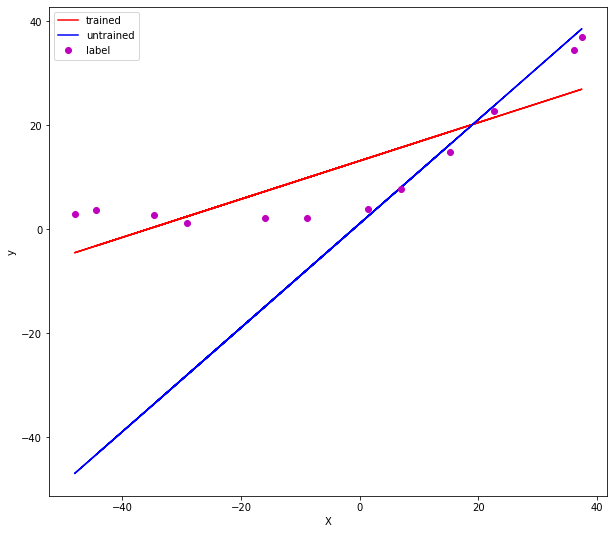

In [7]:
plt.figure(figsize=(10,9))
p1=plt.plot(X, forward(x, a), 'r', label='trained')
p2=plt.plot(X, forward(x, theta), 'b', label='untrained')
p3=plt.plot(X, y, 'om', label='label')

plt.legend()

plt.xlabel('X')
plt.ylabel('y')

plt.show()

#### 위의 그림에서 알 수 있듯, 모델이 데이터에 비해 단순하면 일반화성능이 없는 것(high variance)은 물론, training set에 대해서도 오차가 크게 된다(high bias).

In [8]:
print("[before training]")
print("train error =", costFunction(x, y, theta, 0)[0])
print("cross validation error =", costFunction(xval, yval,theta, 0)[0])
print("test error =", costFunction(xtest, ytest, theta, 0)[0])
print('\n')

print("train error =", costFunction(x, y, a, 0)[0])
print("cross validation error =", costFunction(xval, yval,a, 0)[0])
print("test error =", costFunction(xtest, ytest, a, 0)[0])

[before training]
train error = 303.9515255535976
cross validation error = 344.65081501026566
test error = 342.3791418315095


train error = 22.373907065638427
cross validation error = 29.43317677278829
test error = 32.50666536596448


# overfitting (8차 다항식 가설)

### Feature Normalization을 하지 않은 경우

내가 실제로 feature normalization을 해야된다는 생각을 못하고, overfitting을 내려고 수 없이 시도했으나, 원하는대로 overfitting이 나지 않았다. 나중에 feature normalization을 하지 않아서 그랬다는 사실을 알고 이 항목도 추가하게 되었다. feature 마다 수치상의 차이가 큰 경우 feature normalization은 절대 까먹지 말것

In [9]:
x_poly_non_norm=x
xval_poly_non_norm=xval
xtest_poly_non_norm=xtest
degree=8
for i in range(2,degree+1):
    x_poly_non_norm=np.c_[x_poly_non_norm, x_poly_non_norm[:,1]**i]
    xval_poly_non_norm=np.c_[xval_poly_non_norm, xval_poly_non_norm[:,1]**i]
    xtest_poly_non_norm=np.c_[xtest_poly_non_norm, xtest_poly_non_norm[:,1]**i]
    
theta_poly_non_norm=np.ones([x_poly_non_norm.shape[1], 1])

In [10]:
epochs=100000
lr=1e-26  #8차
Lambda=0
trained_theta_poly_non_norm=train(x_poly_non_norm, y, Lambda)

Training start	J= 140.95412088055392
epoch: 10000 cost: 75.80014960605801
theta: [[8.75827887e-22]
 [2.49770213e-20]
 [6.62211970e-19]
 [3.10361234e-17]
 [6.39541031e-16]
 [4.62970271e-14]
 [5.18238463e-13]
 [7.62826578e-11]
 [1.90086515e-12]]
epoch: 20000 cost: 52.18728594897084
theta: [[1.62560024e-21]
 [4.21003275e-20]
 [1.17139397e-18]
 [5.05783782e-17]
 [1.11066449e-15]
 [7.50415053e-14]
 [8.94773642e-13]
 [1.24441384e-10]
 [2.87056303e-12]]
epoch: 30000 cost: 42.77764914860791
theta: [[2.29580918e-21]
 [5.42654960e-20]
 [1.58399631e-18]
 [6.28640968e-17]
 [1.47552024e-15]
 [9.27036845e-14]
 [1.18196131e-12]
 [1.54841906e-10]
 [3.48266874e-12]]
epoch: 40000 cost: 39.02787930079303
theta: [[2.91579194e-21]
 [6.33007991e-20]
 [1.93563066e-18]
 [7.05690603e-17]
 [1.77329221e-15]
 [1.03370048e-13]
 [1.41274638e-12]
 [1.74032350e-10]
 [3.86904014e-12]]
epoch: 50000 cost: 37.533519035467876
theta: [[3.50406800e-21]
 [7.03603551e-20]
 [2.24877730e-18]
 [7.53823873e-17]
 [2.02871569e-15]


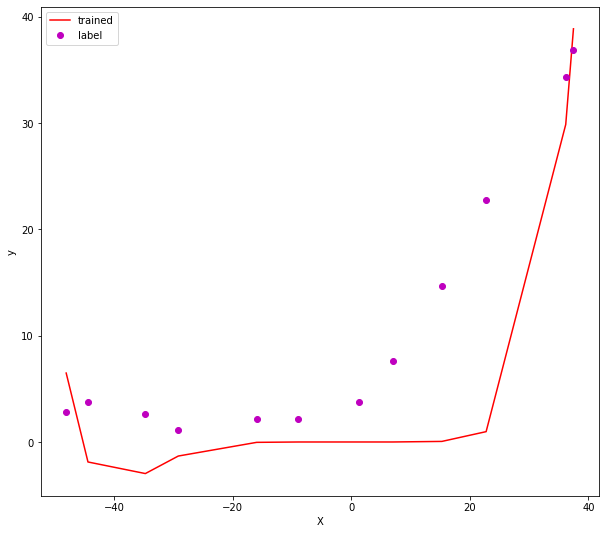

In [11]:
plt.figure(figsize=(10,9))
p1=plt.plot(X[np.argsort(X[:,0])], forward(x_poly_non_norm[np.argsort(x_poly_non_norm[:, 1])], trained_theta_poly_non_norm), 'r', label='trained')
p3=plt.plot(X, y, 'om', label='label')

plt.legend()

plt.xlabel('X')
plt.ylabel('y')

plt.show()

feature normalization을 하지 않으면 다항식 항의 차수가 커질수록 x의 값이 커지므로, 즉 feature들 간의 수치상의 차이가 크므로(ex: x1=4, x8=123123), 학습 시 overfitting이 나게 하고 싶어도 나지 않는 문제가 생긴다. 위 결과를 보면 cost값이 약 36.5에 수렴한 것을 볼 수 있다.

### Feature Normalization을 한 경우

In [12]:
x_poly_norm=np.ones(x_poly_non_norm.shape)
xval_poly_norm=np.ones(xval_poly_non_norm.shape)
xtest_poly_norm=np.ones(xtest_poly_non_norm.shape)
for i in range(1,degree+1):
    x_poly_norm[:,i]=(x_poly_non_norm[:,i]-x_poly_non_norm[:,i].sum()/len(x_poly_non_norm[:,i]))/(x_poly_non_norm[:,i].max()-x_poly_non_norm[:,i].min())
    xval_poly_norm[:,i]=(xval_poly_non_norm[:,i]-xval_poly_non_norm[:,i].sum()/len(xval_poly_non_norm[:,i]))/(xval_poly_non_norm[:,i].max()-xval_poly_non_norm[:,i].min())
    xtest_poly_norm[:,i]=(xtest_poly_non_norm[:,i]-xtest_poly_non_norm[:,i].sum()/len(xtest_poly_non_norm[:,i]))/(xtest_poly_non_norm[:,i].max()-xtest_poly_non_norm[:,i].min())

    


In [13]:
epochs=300000
lr=0.9
Lambda=0
trained_theta_poly_norm=train(x_poly_norm, y, Lambda)

Training start	J= 140.95412088055392
epoch: 30000 cost: 0.1839825120692451
theta: [[ 11.21758933]
 [ 33.60609224]
 [ 40.27065693]
 [ 28.6556073 ]
 [-24.40885601]
 [-29.35033653]
 [  7.51151674]
 [ -5.31431515]
 [-13.45592926]]
epoch: 60000 cost: 0.15157772221150279
theta: [[ 11.21758933]
 [ 32.73361058]
 [ 42.8242636 ]
 [ 35.15075329]
 [-36.57479494]
 [-45.09234549]
 [ 23.35924687]
 [  7.09584969]
 [-17.4258179 ]]
epoch: 90000 cost: 0.12779760856186367
theta: [[ 11.21758933]
 [ 32.42831148]
 [ 45.16782744]
 [ 38.41069233]
 [-47.96213374]
 [-57.4208517 ]
 [ 36.81482567]
 [ 19.76904677]
 [-18.55246522]]
epoch: 120000 cost: 0.10943040710464094
theta: [[ 11.21758933]
 [ 32.25357893]
 [ 47.23370562]
 [ 40.81851769]
 [-58.02636859]
 [-68.13029875]
 [ 48.32859243]
 [ 31.45065387]
 [-18.873438  ]]
epoch: 150000 cost: 0.09516857637591193
theta: [[ 11.21758933]
 [ 32.11383384]
 [ 49.03608635]
 [ 42.9086953 ]
 [-66.79325009]
 [-77.71489383]
 [ 58.1774466 ]
 [ 41.99476071]
 [-18.85710817]]
epoch: 

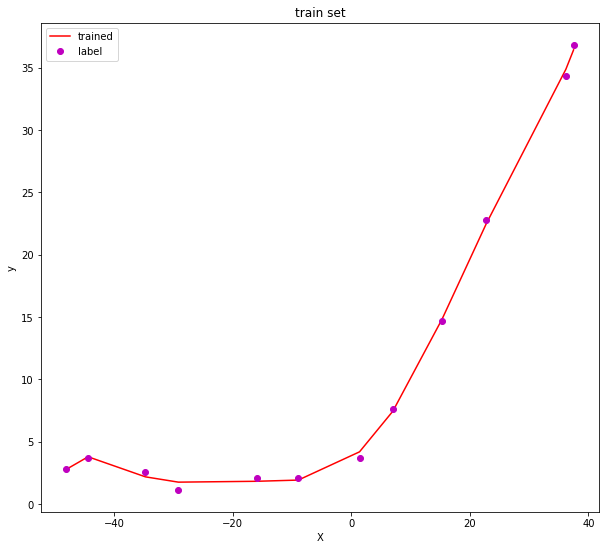

In [14]:
plt.figure(figsize=(10,9))
p1=plt.plot(X[np.argsort(X[:,0])], forward(x_poly_norm[np.argsort(x_poly_norm[:, 1])], trained_theta_poly_norm), 'r', label='trained')
p3=plt.plot(X, y, 'om', label='label')

plt.legend()
plt.title("train set")
plt.xlabel('X')
plt.ylabel('y')

plt.show()

#### 그래프가 데이터에 거의 정확히 적합된 것을 확인할 수 있다.

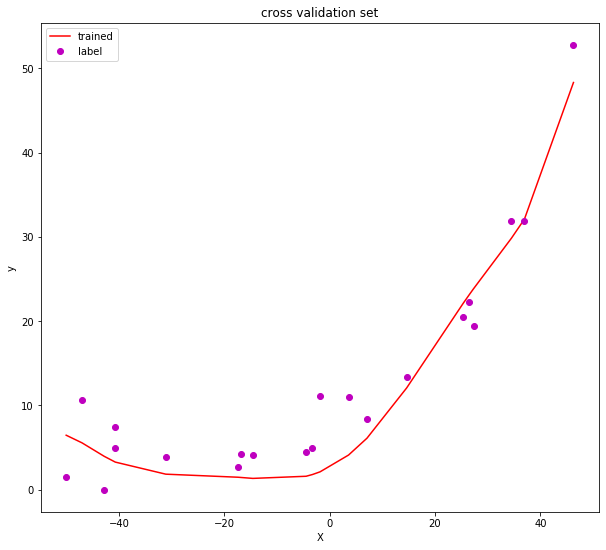

In [15]:
plt.figure(figsize=(10,9))
p1=plt.plot(Xval[np.argsort(Xval[:,0])], forward(xval_poly_norm[np.argsort(xval_poly_norm[:, 1])], trained_theta_poly_norm), 'r', label='trained')
p3=plt.plot(Xval, yval, 'om', label='label')

plt.legend()
plt.title('cross validation set')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

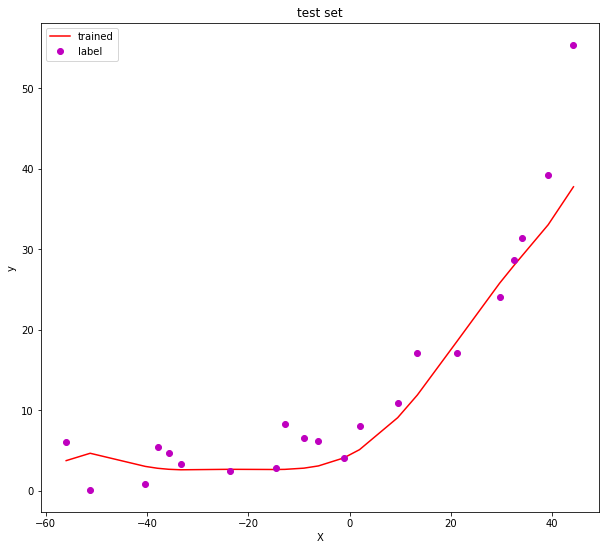

In [16]:
plt.figure(figsize=(10,9))
p1=plt.plot(Xtest[np.argsort(Xtest[:,0])], forward(xtest_poly_norm[np.argsort(xtest_poly_norm[:, 1])], trained_theta_poly_norm), 'r', label='trained')
p3=plt.plot(Xtest, ytest, 'om', label='label')

plt.legend()
plt.title('test set')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [17]:
print("[before training]")
print("train error =", costFunction(x_poly_norm, y, np.ones(trained_theta_poly_norm.shape), 0)[0])
print("cross validation error =", costFunction(xval_poly_norm, yval,np.ones(trained_theta_poly_norm.shape), 0)[0])
print("test error =", costFunction(xtest_poly_norm, ytest, np.ones(trained_theta_poly_norm.shape), 0)[0])
print('\n')

print("[after training]")
print("train error =", costFunction(x_poly_norm, y, trained_theta_poly_norm, 0)[0])
print("cross validation error =", costFunction(xval_poly_norm, yval,trained_theta_poly_norm, 0)[0])
print("test error =", costFunction(xtest_poly_norm, ytest, trained_theta_poly_norm, 0)[0])
print('\n')



[before training]
train error = 121.56321569450995
cross validation error = 141.51590843411373
test error = 169.6952531922153


[after training]
train error = 0.058957291997377745
cross validation error = 7.309802833356965
test error = 11.796045675253197




#### 모델을 학습시킨 후 train error, cross validation error, test error을 각각 비교해본 결과 train error는 0에 수렴하는 반면 나머지 error은 그렇지 않다.
#### overfitting이 발생(low bias, high variance)했다는 사실을 알 수 있다. 즉, 일반화 성능이 떨어진다고 할 수 있다.  따라서 regularization을 한 후 일반화 성능이 얼마나 좋아지는지 확인해보자.

# Regularization

In [18]:
epochs=30000
lr=0.9
Lambda=0.1
trained_theta_poly_norm_reg=train(x_poly_norm, y, Lambda)

Training start	J= 140.95412088055392
epoch: 3000 cost: 6.573486627956593
theta: [[11.21758933]
 [26.65015851]
 [16.37791056]
 [10.05729378]
 [ 6.41891665]
 [ 5.19523542]
 [ 2.51891452]
 [ 3.55410055]
 [ 0.50326928]]
epoch: 6000 cost: 6.573486627956594
theta: [[11.21758933]
 [26.65015851]
 [16.37791056]
 [10.05729378]
 [ 6.41891665]
 [ 5.19523542]
 [ 2.51891452]
 [ 3.55410055]
 [ 0.50326928]]
epoch: 9000 cost: 6.573486627956594
theta: [[11.21758933]
 [26.65015851]
 [16.37791056]
 [10.05729378]
 [ 6.41891665]
 [ 5.19523542]
 [ 2.51891452]
 [ 3.55410055]
 [ 0.50326928]]
epoch: 12000 cost: 6.573486627956594
theta: [[11.21758933]
 [26.65015851]
 [16.37791056]
 [10.05729378]
 [ 6.41891665]
 [ 5.19523542]
 [ 2.51891452]
 [ 3.55410055]
 [ 0.50326928]]
epoch: 15000 cost: 6.573486627956594
theta: [[11.21758933]
 [26.65015851]
 [16.37791056]
 [10.05729378]
 [ 6.41891665]
 [ 5.19523542]
 [ 2.51891452]
 [ 3.55410055]
 [ 0.50326928]]
epoch: 18000 cost: 6.573486627956594
theta: [[11.21758933]
 [26.65

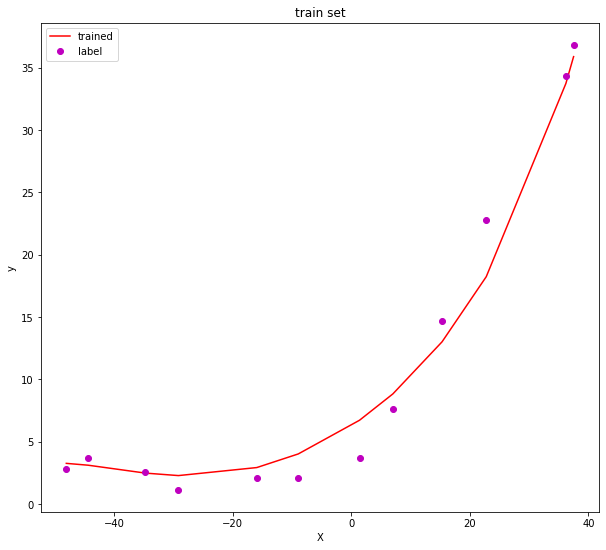

In [19]:
plt.figure(figsize=(10,9))
p1=plt.plot(X[np.argsort(X[:,0])], forward(x_poly_norm[np.argsort(x_poly_norm[:, 1])], trained_theta_poly_norm_reg), 'r', label='trained')
p3=plt.plot(X, y, 'om', label='label')

plt.legend()
plt.title("train set")
plt.xlabel('X')
plt.ylabel('y')

plt.show()

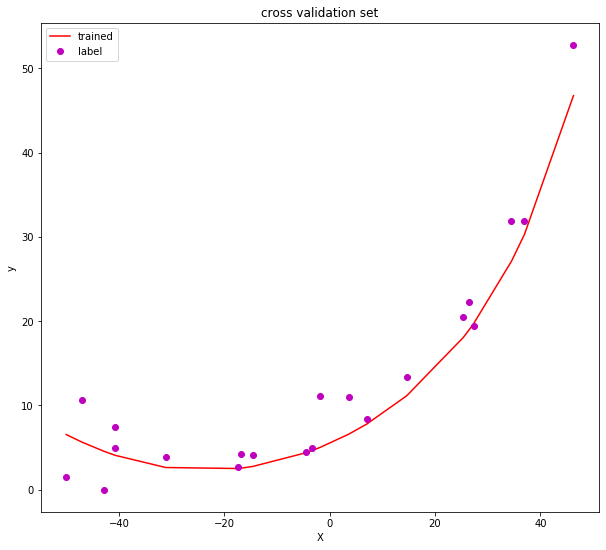

In [20]:
plt.figure(figsize=(10,9))
p1=plt.plot(Xval[np.argsort(Xval[:,0])], forward(xval_poly_norm[np.argsort(xval_poly_norm[:, 1])], trained_theta_poly_norm_reg), 'r', label='trained')
p3=plt.plot(Xval, yval, 'om', label='label')

plt.legend()
plt.title('cross validation set')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

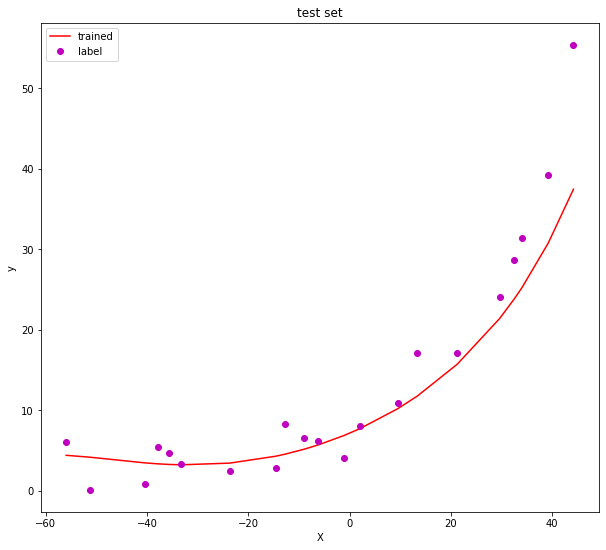

In [21]:
plt.figure(figsize=(10,9))
p1=plt.plot(Xtest[np.argsort(Xtest[:,0])], forward(xtest_poly_norm[np.argsort(xtest_poly_norm[:, 1])], trained_theta_poly_norm_reg), 'r', label='trained')
p3=plt.plot(Xtest, ytest, 'om', label='label')

plt.legend()
plt.title('test set')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

#### 규제를 한 결과 육안으로 그래프를 봤을 때 일반화 성능이 월등히 좋아졌음을 알 수 있다. 수치상으로도 그런지 확인해보자.

In [22]:
Lambda=0.1
print("[before training]")
print("train error =", costFunction(x_poly_norm, y, np.ones(trained_theta_poly_norm_reg.shape), Lambda)[0])
print("cross validation error =", costFunction(xval_poly_norm, yval,np.ones(trained_theta_poly_norm_reg.shape), Lambda)[0])
print("test error =", costFunction(xtest_poly_norm, ytest, np.ones(trained_theta_poly_norm_reg.shape), Lambda)[0])
print('\n')

print("[after training]")
print("train error =", costFunction(x_poly_norm, y, trained_theta_poly_norm_reg, Lambda)[0])
print("cross validation error =", costFunction(xval_poly_norm, yval,trained_theta_poly_norm_reg, Lambda)[0])
print("test error =", costFunction(xtest_poly_norm, ytest, trained_theta_poly_norm_reg, Lambda)[0])
print('\n')



[before training]
train error = 121.59654902784328
cross validation error = 141.53495605316135
test error = 169.71430081126292


[after training]
train error = 6.573486627956594
cross validation error = 8.239127359110709
test error = 15.868739953228841




규제를 하지 않았을 때 traing error는 0에, cross validation error, test error는 각각 7과 11에 수렴한 것과는 달리, 규제를 하고 났을 때 train error은 6, cross validation error, test error은 각각 8, 15에 수렴한 것을 확인할 수 있다. 즉 일반화 성능이 좋아졌음을 알 수 있다. 

In [23]:
Lambdas=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

In [24]:
lr=0.9

train_error_list=[]
val_error_list=[]
test_error_list=[]
theta_list=[]

for Lambda in Lambdas:
    if(Lambda==0):
        epochs=300000
    else:
        epochs=100000
    t=train_no_print(x_poly_norm, y, Lambda)
    theta_list.append(t)
    train_error_list.append(costFunction(x_poly_norm, y, t, 0)[0])
    val_error_list.append(costFunction(xval_poly_norm, yval, t, 0)[0])
    test_error_list.append(costFunction(xtest_poly_norm, ytest, t, 0)[0])

training end
training end
training end
training end
training end
training end
training end
training end
training end
training end


### Lambda 값에 따른 train error, cross validation error의 변화 그래프

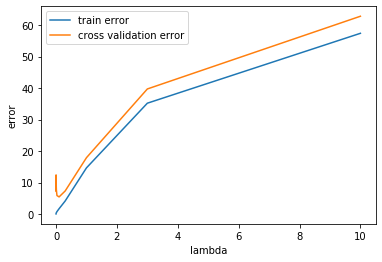

In [29]:
plt.plot(Lambdas, train_error_list, label='train error')
plt.plot(Lambdas, val_error_list, label='cross validation error')
plt.xlabel('lambda')
plt.ylabel('error')
plt.legend()
plt.show()

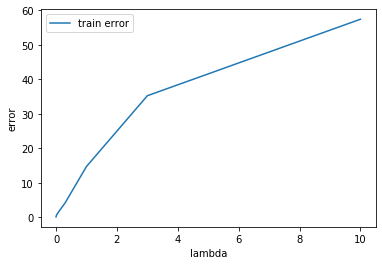

In [30]:
plt.plot(Lambdas, train_error_list, label='train error')
plt.xlabel('lambda')
plt.ylabel('error')
plt.legend()
plt.show()

In [27]:
cnt=0
for Lambda in Lambdas:
    print("----------------Lambda={:.3f}----------------".format(Lambda))
    print("[before training]")
    print("train error =", costFunction(x_poly_norm, y, np.ones(theta_list[cnt].shape), Lambda)[0])
    print("cross validation error =", costFunction(xval_poly_norm, yval,np.ones(theta_list[cnt].shape), Lambda)[0])
    print("test error =", costFunction(xtest_poly_norm, ytest, np.ones(theta_list[cnt].shape), Lambda)[0])
    print('\n')

    print("[after training]")
    print("train error =", costFunction(x_poly_norm, y, theta_list[cnt], Lambda)[0])
    print("cross validation error =", costFunction(xval_poly_norm, yval, theta_list[cnt], Lambda)[0])
    print("test error =", costFunction(xtest_poly_norm, ytest, theta_list[cnt], Lambda)[0])
    print('\n')
    cnt+=1



----------------Lambda=0.000----------------
[before training]
train error = 121.56321569450995
cross validation error = 141.51590843411373
test error = 169.6952531922153


[after training]
train error = 0.058957291997377745
cross validation error = 7.309802833356965
test error = 11.796045675253197


----------------Lambda=0.001----------------
[before training]
train error = 121.56354902784328
cross validation error = 141.5160989103042
test error = 169.69544366840577


[after training]
train error = 0.36830667412391555
cross validation error = 12.523881949354648
test error = 12.141210796560397


----------------Lambda=0.003----------------
[before training]
train error = 121.56421569450995
cross validation error = 141.51647986268515
test error = 169.6958246207867


[after training]
train error = 0.6154709887333207
cross validation error = 10.593838810973555
test error = 11.96759187476104


----------------Lambda=0.010----------------
[before training]
train error = 121.56654902784328


## Lambda selection

cross validation error가 가장 작은 lambda를 찾아보자

In [28]:
min_lambda_index=val_error_list.index(min(val_error_list))
print('The best lambda is',Lambdas[min_lambda_index])

The best lambda is 0.1
